In [1]:
import math
import sympy as sm
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('bmh')
#We will use m = hbar = omega = 1 henceforth
#This notebook is a bit slow, but show some understanding as there are many computations

In [2]:
n = sm.symbols('n', positive=True)
x = sm.Symbol('x')
psi = sm.hermite(n,x)*sm.exp(-x**2/2)*sm.pi**(-1/4)*(1/sm.sqrt(sm.factorial(n)*2**n))
psi #Lets check if we are doing things correctly

exp(-x**2/2)*hermite(n, x)/(2**(n/2)*pi**0.25*sqrt(factorial(n)))

In [3]:
def innerProduct(i,j,extraTerm):
    return sm.integrate(extraTerm*psi.subs({n:i})*psi.subs({n:j}),(x,-sm.oo,sm.oo))

In [4]:
for i in range(4):
    for j in range(4):
        value = innerProduct(i,j,1)
        print(f"For i : {i} and j : {j} the inner product of the wave functions is: {value}")
#As it can be seen they truly satisfy the normalization condition we imposed, <psi_n|psi_m> = delta_nm

For i : 0 and j : 0 the inner product of the wave functions is: 1
For i : 0 and j : 1 the inner product of the wave functions is: 0
For i : 0 and j : 2 the inner product of the wave functions is: 0
For i : 0 and j : 3 the inner product of the wave functions is: 0
For i : 1 and j : 0 the inner product of the wave functions is: 0
For i : 1 and j : 1 the inner product of the wave functions is: 1
For i : 1 and j : 2 the inner product of the wave functions is: 0
For i : 1 and j : 3 the inner product of the wave functions is: 0
For i : 2 and j : 0 the inner product of the wave functions is: 0
For i : 2 and j : 1 the inner product of the wave functions is: 0
For i : 2 and j : 2 the inner product of the wave functions is: 1
For i : 2 and j : 3 the inner product of the wave functions is: 0
For i : 3 and j : 0 the inner product of the wave functions is: 0
For i : 3 and j : 1 the inner product of the wave functions is: 0
For i : 3 and j : 2 the inner product of the wave functions is: 0
For i : 3 

In [5]:
#We have the perturbation gV = lamda/2 * x**4
l,V = sm.symbols('lambda V') 
g,V,E = l/2,x**4, (n+1/2)

In [6]:
#Lets compute the first order corrections
firstOrderEnergyCorrections = []
for index in range(11):
    firstOrderEnergyCorrections.append(innerProduct(index,index,extraTerm=V))
firstOrderEnergyCorrections

[3/4, 15/4, 39/4, 75/4, 123/4, 183/4, 255/4, 339/4, 435/4, 543/4, 663/4]

In [7]:
#Ex 2.
upperLimit = 20
def secondOrder(currentN):
    sumCorrections = 0
    for m in range(upperLimit+1):
        if m == currentN:
            continue
        part1 = (innerProduct(m,currentN,extraTerm=V))**2
        part2 = E.subs({n:currentN}) - E.subs({n:m})
        result = part1/part2
        sumCorrections += result
    return sumCorrections

In [8]:
secondOrderEnergyCorrections = []
for index in range(5):
    secondOrderEnergyCorrections.append(secondOrder(index))
secondOrderEnergyCorrections #As we can see the energy corrections get more negative as we iterate further

[-2.62500000000000,
 -20.6250000000000,
 -76.8750000000000,
 -196.875000000000,
 -406.125000000000]

In [9]:
#Ex 3.
def firstOrder(currentN,limit):
    sumCorrections = 0
    for m in range(limit):
        if m == currentN:
            continue
        part1 = (innerProduct(m,currentN,extraTerm=V))*psi.subs({n:m})
        part2 = E.subs({n:currentN}) - E.subs({n:m})
        result = part1/part2
        sumCorrections += result
    return sumCorrections

In [10]:
firstOrderWFArray = []
wfLimits = [1,2,3,5,10]
for element in wfLimits: 
    firstOrderWFArray.append(sm.simplify(firstOrder(0,element)))

In [11]:
xValues = np.linspace(-5,5,1000)
yValues = []
for WF in firstOrderWFArray:
    yValues.append([WF.subs({x:index}) for index in xValues])

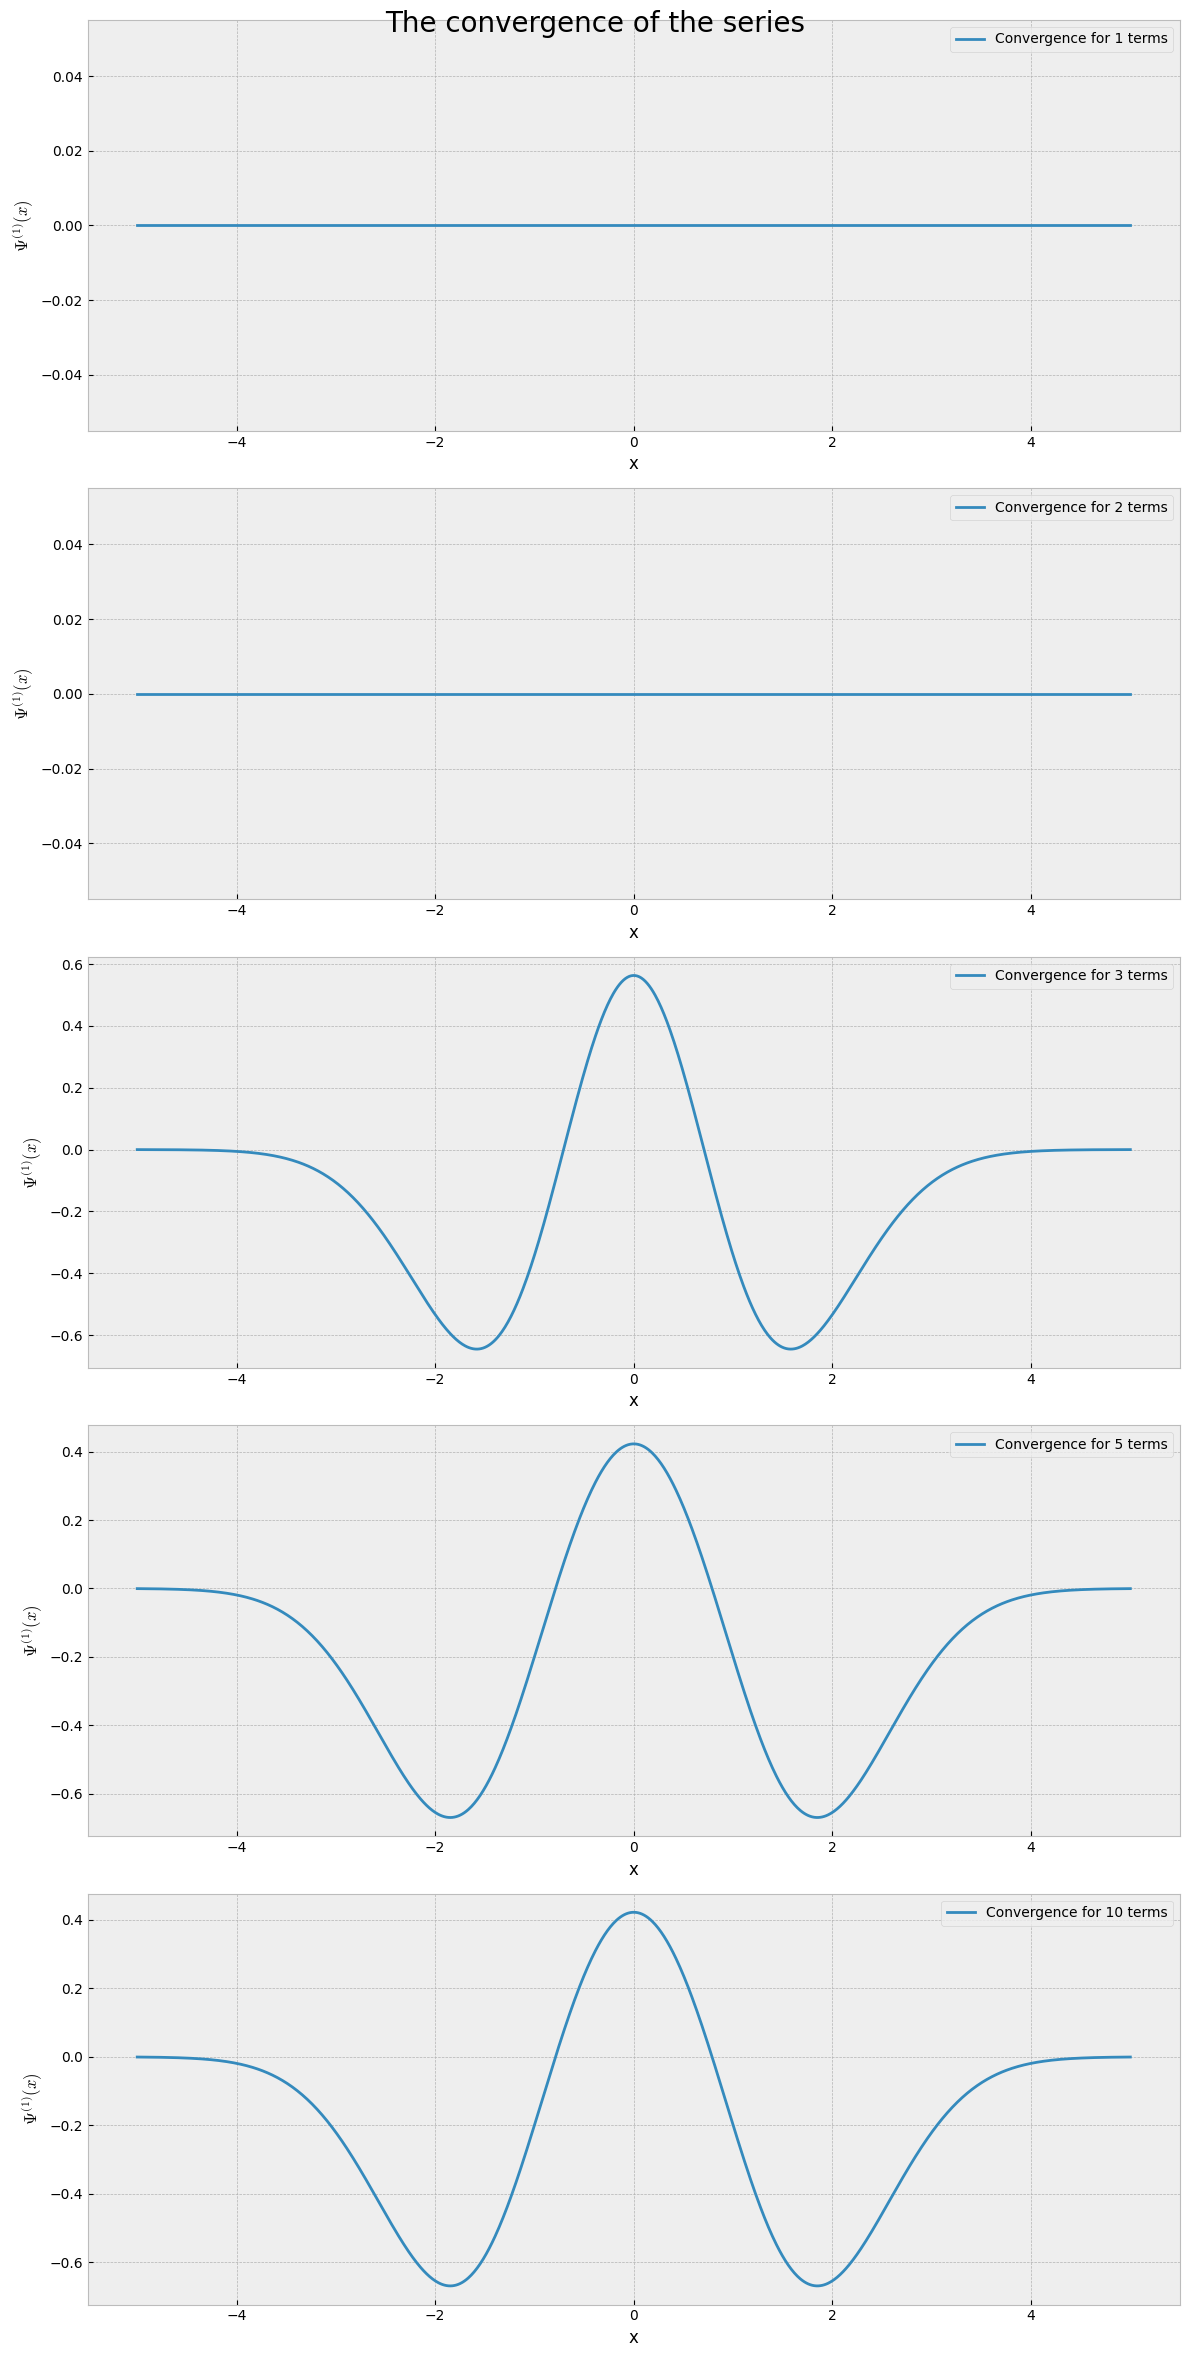

In [12]:
figs, axs = plt.subplots(len(wfLimits),figsize=(12,24),squeeze=False)
figs.suptitle('The convergence of the series',fontsize=20)
for i, ax in enumerate(axs.flatten()):
    ax.plot(xValues,yValues[i],label=f'Convergence for {wfLimits[i]} terms')
    ax.set_xlabel(r"x")
    ax.set_ylabel(r'$\Psi^{(1)} (x)$')
    ax.legend()
plt.tight_layout()
plt.show()

In [13]:
#As we can see the series converges nicely